# Notebook 10 - Seaborn and Pandas

Graphics library built on top of Matplotlib.
   * Provides additional plotting and statistical tools
   * Extra emphasis on aesthetics
   * Interfaces well with pandas

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline 
import seaborn as sns
from scipy import stats, integrate

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("time").resample("10min").mean() 
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean() 
df_temp = pd.concat([df1, df2], axis=1)

In [4]:
df_temp.head()

,outdoor,indoor
time,,
2014-01-01 00:00:00+01:00,4.38,21.94
2014-01-01 00:10:00+01:00,4.25,22.00
2014-01-01 00:20:00+01:00,4.19,22.00
2014-01-01 00:30:00+01:00,4.06,22.00
2014-01-01 00:40:00+01:00,4.06,22.00


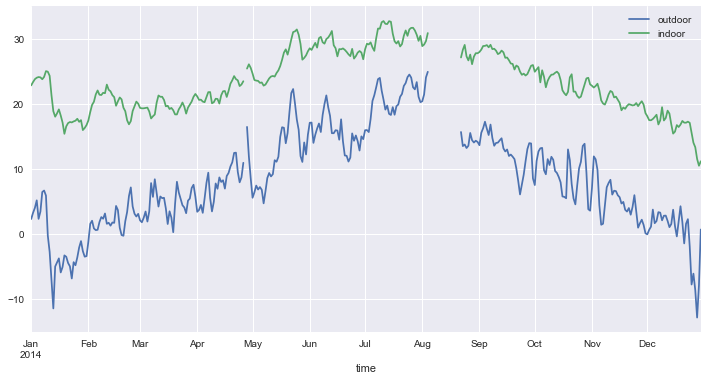

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

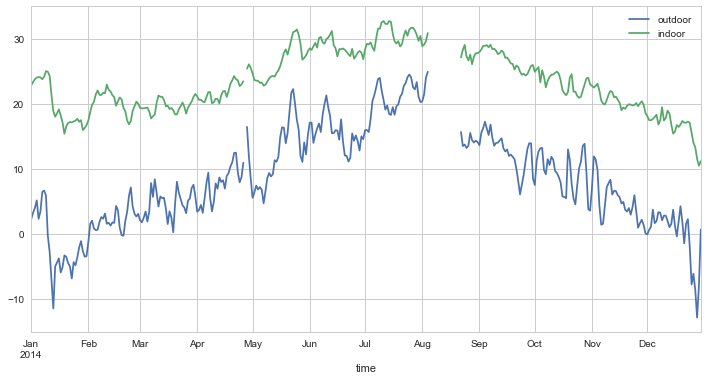

In [6]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

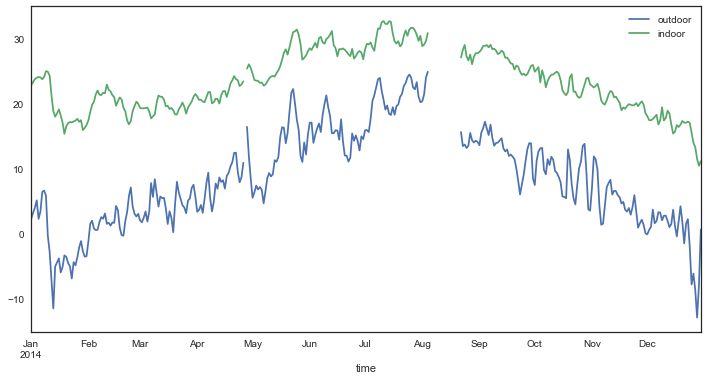

In [7]:
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

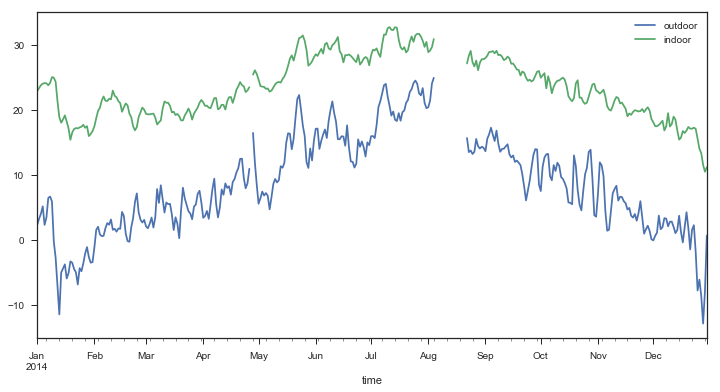

In [8]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

In [9]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 6.0,
 'xtick.minor.size': 3.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 6.0,
 'ytick.minor.size': 3.0}

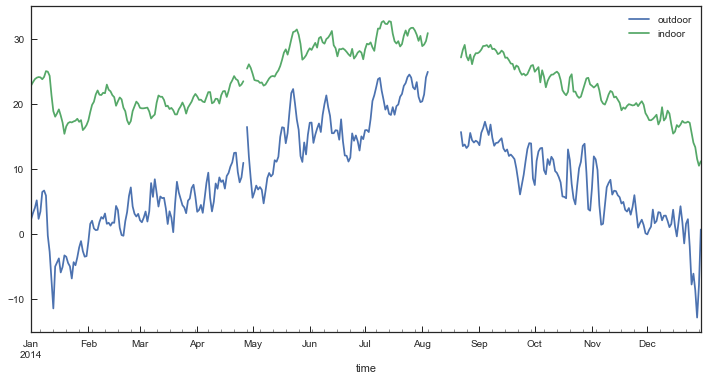

In [10]:
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

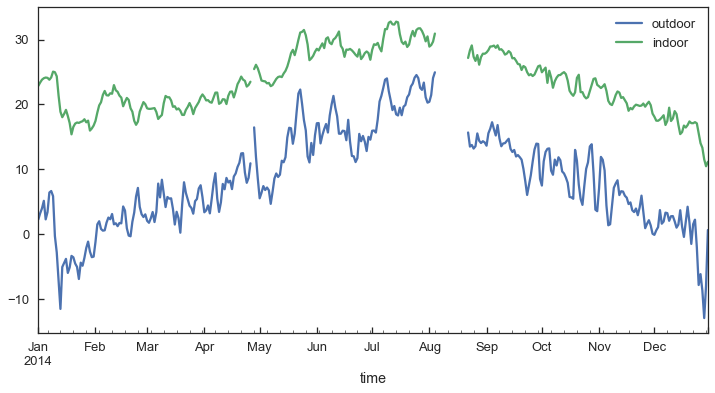

In [11]:
sns.set_context("talk")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

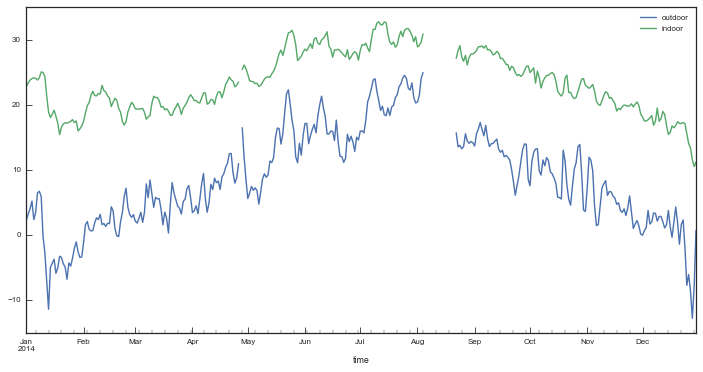

In [12]:
sns.set_context("paper")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

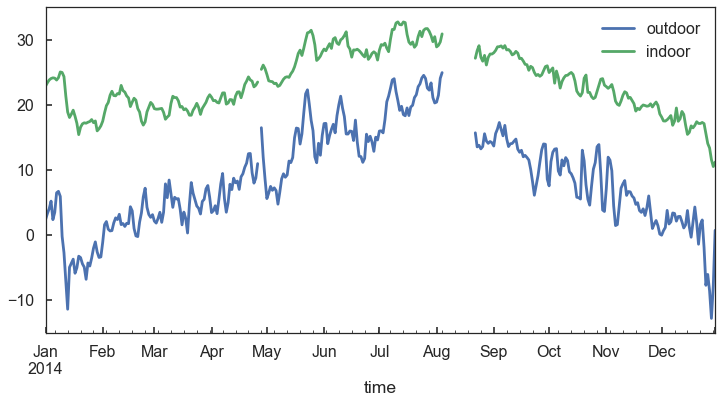

In [13]:
sns.set_context("poster")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

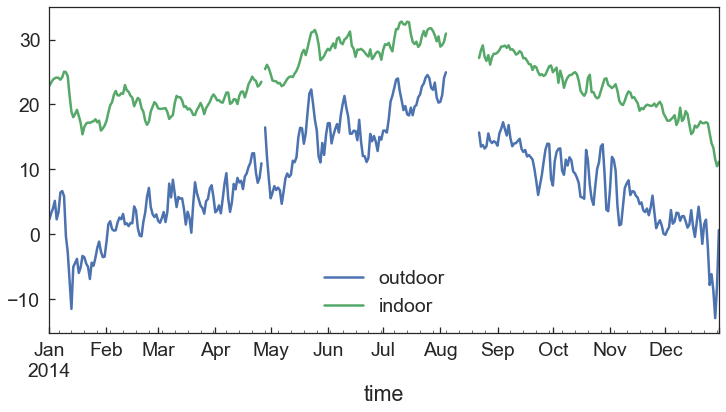

In [14]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

### seaborn.distplot

visualize the distribution of your data with a histogram (with some extra features)

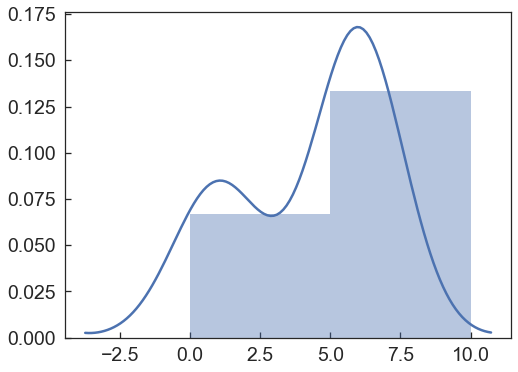

In [15]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.distplot([1,6,6],hist_kws={'range':(0,10)})

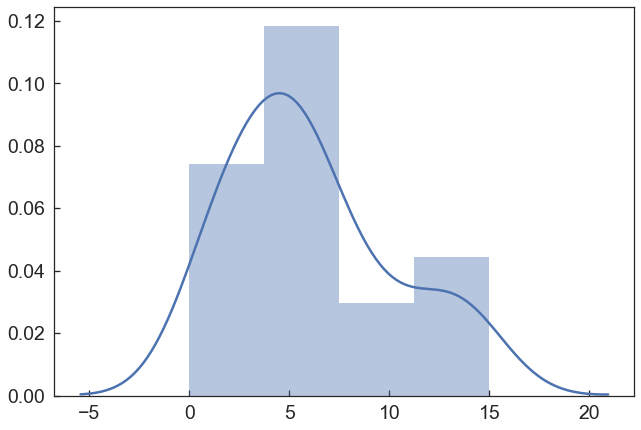

In [16]:
sns.distplot([1.1,6.5,4.2,2.1,1.5,4.5,9.6,5.6,4.7,4.8,2.9,1.2,6.6,8.7,12.6,14.4,13.2,5.6],hist_kws={'range':(0,15)})

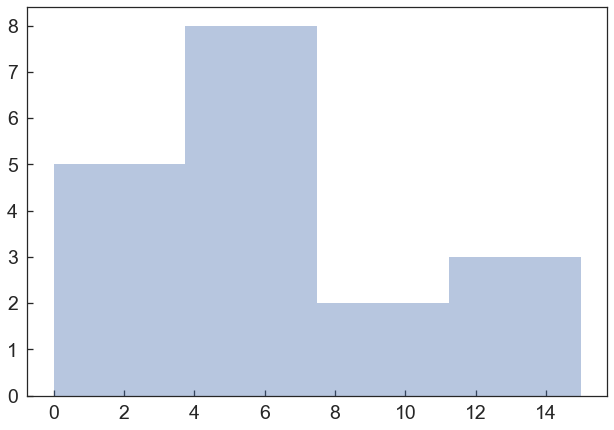

In [17]:
sns.distplot([1.1,6.5,4.2,2.1,1.5,4.5,9.6,5.6,4.7,4.8,2.9,1.2,6.6,8.7,12.6,14.4,13.2,5.6],kde=False,hist_kws={'range':(0,15)})

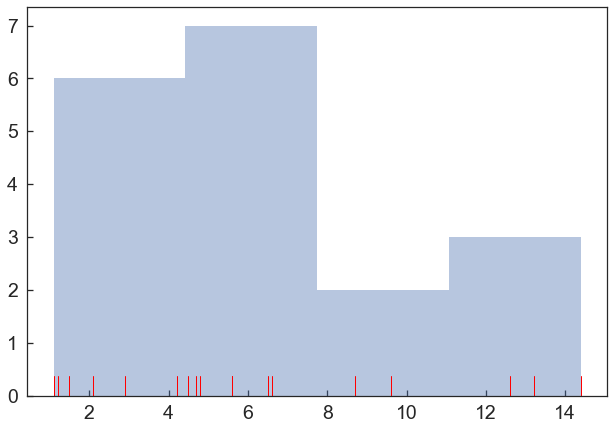

In [18]:
sns.distplot([1.1,6.5,4.2,2.1,1.5,4.5,9.6,5.6,4.7,4.8,2.9,1.2,6.6,8.7,12.6,14.4,13.2,5.6],kde=False,rug=True,rug_kws={"color": "r"})

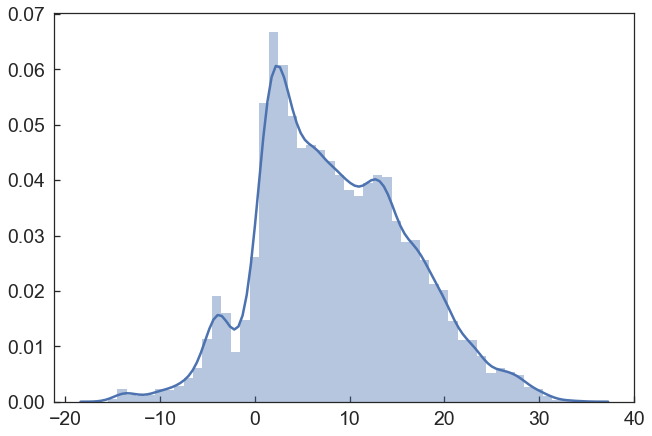

In [19]:
sns.distplot(df_temp["outdoor"].dropna().values)

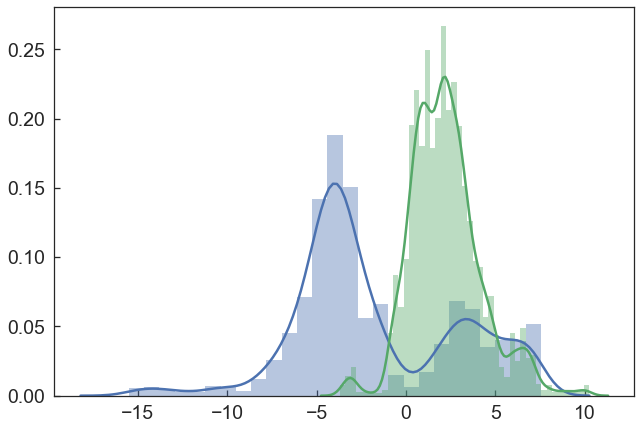

In [20]:
df_temp_jan=df_temp["2014-1-1":"2014-1-31"]
df_temp_feb=df_temp["2014-2-1":"2014-2-28"]
sns.distplot(df_temp_jan["outdoor"].dropna().values)
sns.distplot(df_temp_feb["outdoor"].dropna().values)

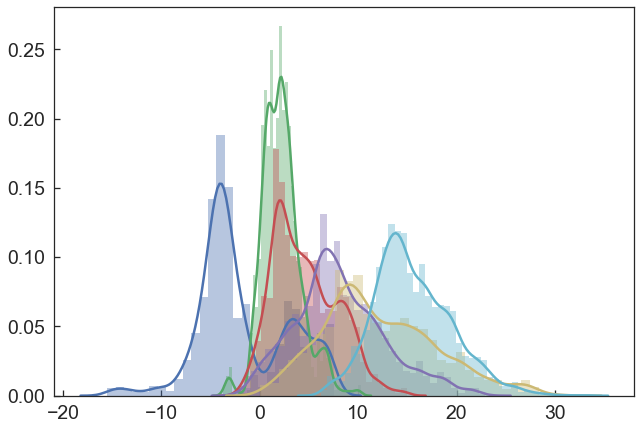

In [21]:
df_temp_jan=df_temp["2014-1-1":"2014-1-31"]
df_temp_feb=df_temp["2014-2-1":"2014-2-28"]
df_temp_mar=df_temp["2014-3-1":"2014-3-30"]
df_temp_apr=df_temp["2014-4-1":"2014-4-30"]
df_temp_may=df_temp["2014-5-1":"2014-5-30"]
df_temp_jun=df_temp["2014-6-1":"2014-6-30"]
sns.distplot(df_temp_jan["outdoor"].dropna().values)
sns.distplot(df_temp_feb["outdoor"].dropna().values)
sns.distplot(df_temp_mar["outdoor"].dropna().values)
sns.distplot(df_temp_apr["outdoor"].dropna().values)
sns.distplot(df_temp_may["outdoor"].dropna().values)
sns.distplot(df_temp_jun["outdoor"].dropna().values)

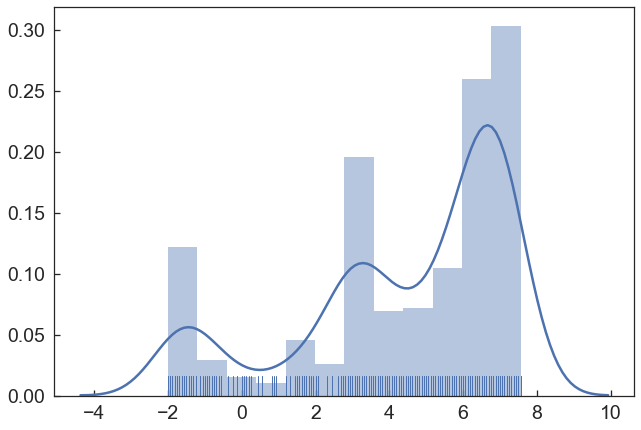

In [22]:
df_temp_jan1tojan5=df_temp["2014-1-06":"2014-1-10"]
sns.distplot(df_temp_jan1tojan5["outdoor"].dropna().values,rug=True)

What is the curve? Is it a fit?

No, by default it is a Kernel Density Estimation

Functional fit - "Parametric method" to estimate the distribution function

Kernel Density Estimation (KDE) - "Non-parametric" tool to estimate the underlying distribution function.

KDE returns a "smoothed" distribution.

Most common method: For each discrete datapoint, draw a Gaussian "kernel" (a gaussian function with area equal to one). Add together all of the kernels to get the estimated "smooth" function.

The KDE has two principla options:
* the type of function (most commonly a Gaussian)
* the smoothing parameter (the "bandwidth") - for a Gassian this is the width of the Gaussian


In [23]:
x = np.random.chisquare(8, 40)

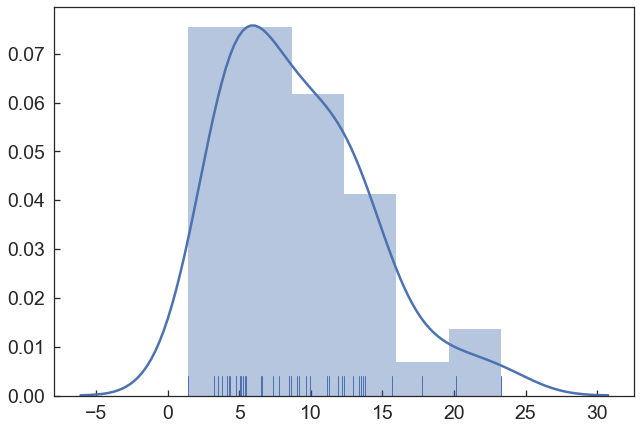

In [24]:
sns.distplot(x,rug=True)

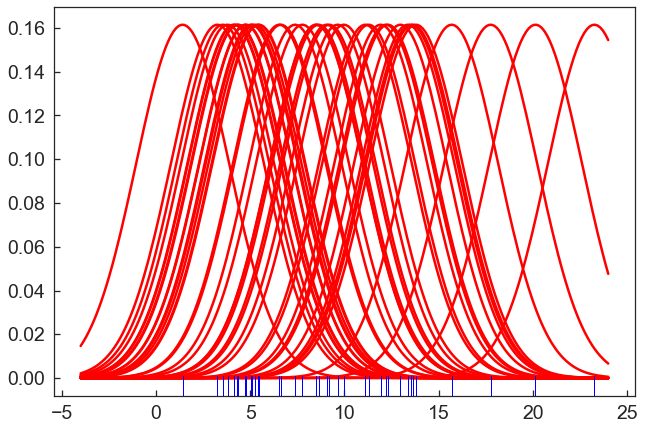

In [25]:
# Example from https://seaborn.pydata.org/tutorial/distributions.html
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 24, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color="b", linewidth=1);

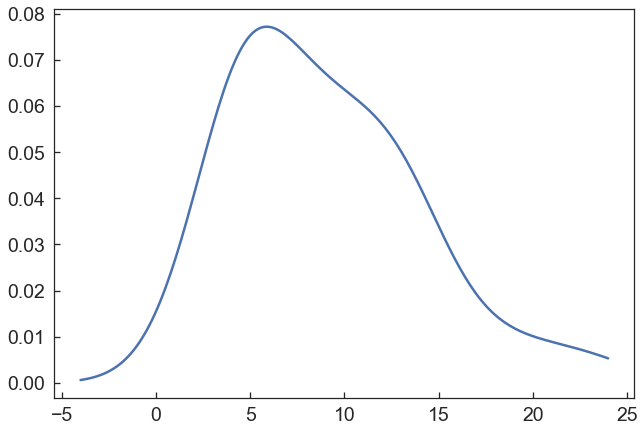

In [26]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

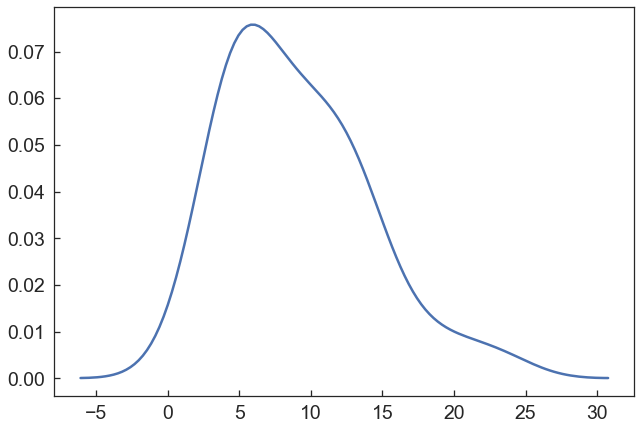

In [27]:
# You can do just the KDE (and not the histogram) using kdeplot

sns.kdeplot(x)

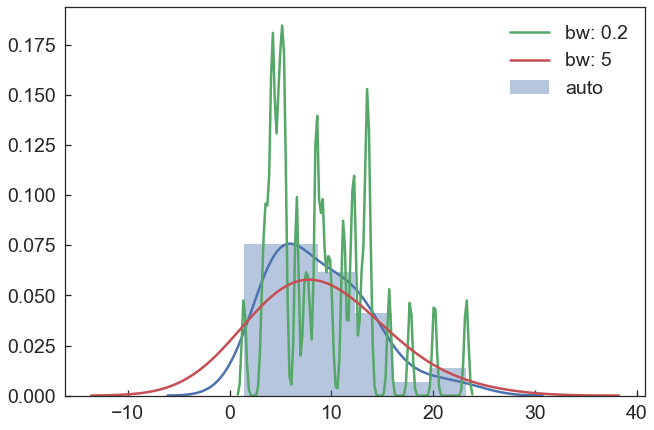

In [28]:
# bandwidth choice is important, but automatic is generally a good algorithim
sns.distplot(x, label="auto")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=5, label="bw: 5")
plt.legend();

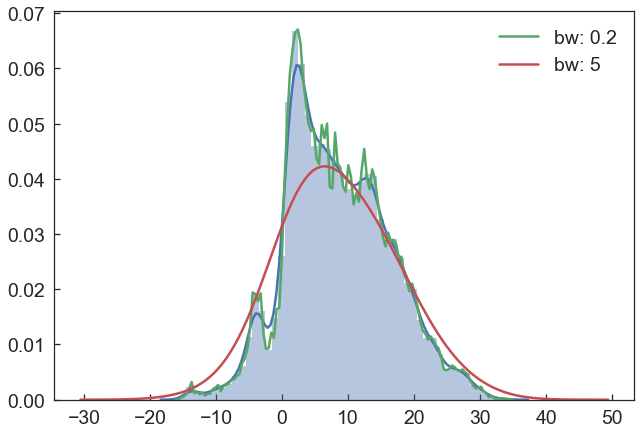

In [29]:
sns.distplot(df_temp["outdoor"].dropna().values)
sns.kdeplot(df_temp["outdoor"].dropna().values, bw=.2, label="bw: 0.2")
sns.kdeplot(df_temp["outdoor"].dropna().values, bw=5, label="bw: 5")
plt.legend();

Seaborn distplot does allow you to do a parametric fit instead of a KDE (or do both)

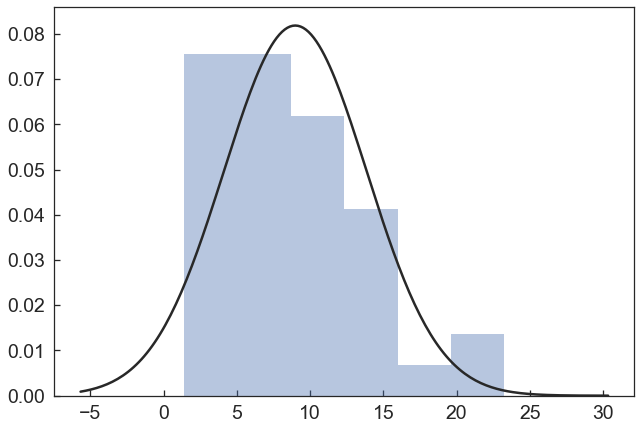

In [30]:
sns.distplot(x, kde=False, fit=stats.norm);

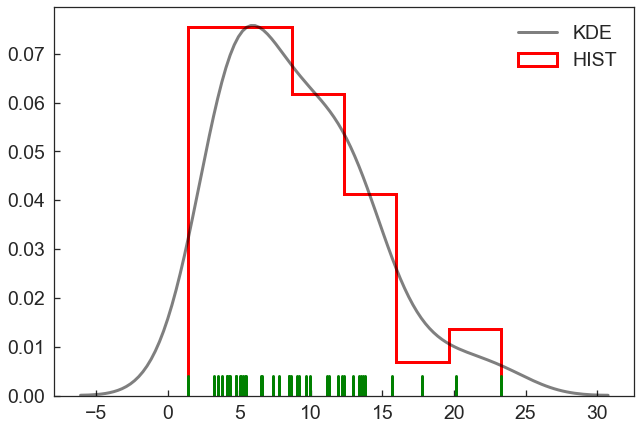

In [31]:
sns.distplot(x,
             rug=True, 
             rug_kws={"color": "g", "linewidth":3}, 
             kde_kws={"color": "k", "lw": 3, "label": "KDE", "alpha":0.5},
             hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r", "label": "HIST"}
            )

#### Scatterplots and fits

seaborn functions regplot() or lmplot()

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Both of these allow you to plot your data and a linear regression (a linear fit), or just your data as a scatter plot.


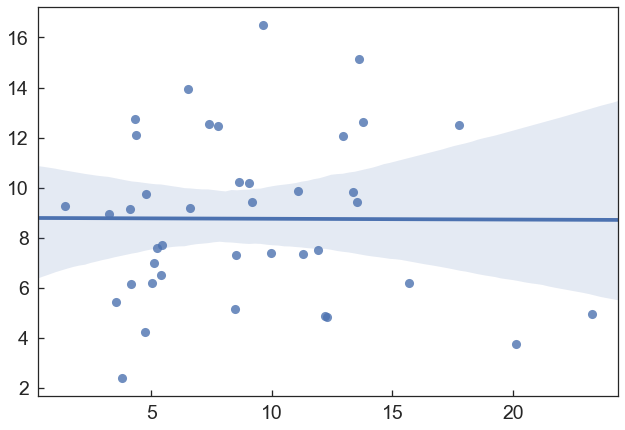

In [32]:
y = np.random.chisquare(9, 40)

sns.regplot(x, # Horizontal axis
           y) # Vertical axis


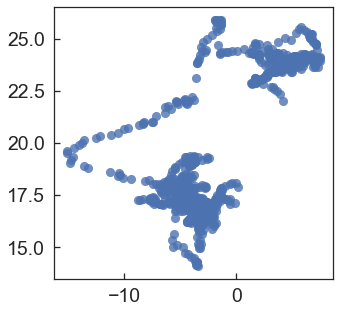

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.regplot(df_temp_jan.resample("H")["outdoor"].mean().values, # Horizontal axis
           df_temp_jan.resample("H")["indoor"].mean().values, # Vertical axis
            fit_reg= False
           )

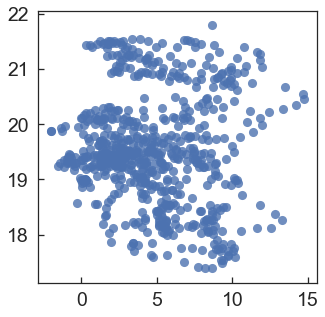

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.regplot(df_temp_mar.resample("H")["outdoor"].mean().values, # Horizontal axis
           df_temp_mar.resample("H")["indoor"].mean().values, # Vertical axis
            fit_reg= False
           )

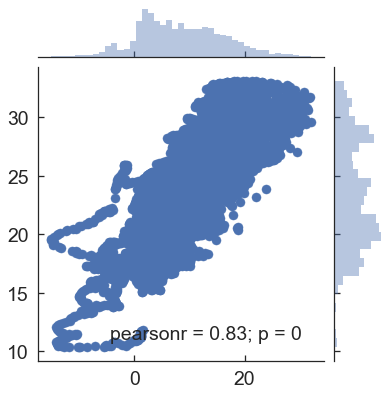

In [35]:
sns.jointplot(df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           df_temp.resample("H")["indoor"].mean().values # Vertical axis
           )

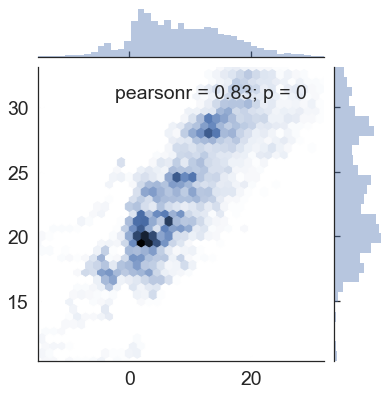

In [36]:
sns.jointplot(df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           df_temp.resample("H")["indoor"].mean().values # Vertical axis
              , kind="hex"
           )


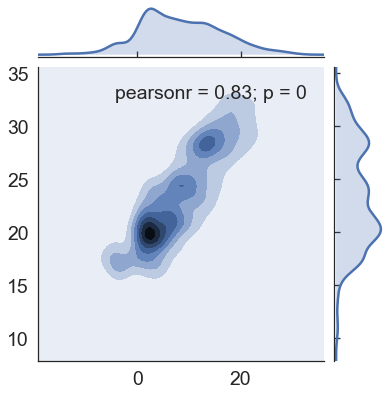

In [37]:
sns.jointplot(df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           df_temp.resample("H")["indoor"].mean().values # Vertical axis
              , kind="kde"
           )

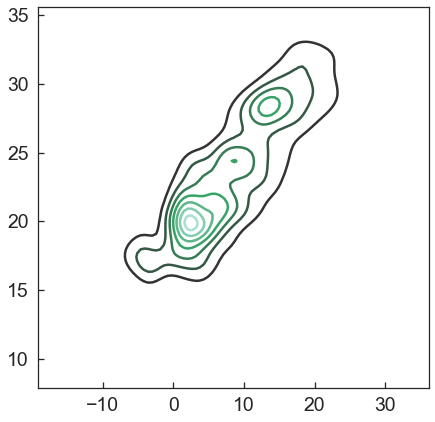

In [38]:
f, ax = plt.subplots(figsize=(7, 7))

sns.kdeplot(df_temp.resample("H")["outdoor"].mean().dropna().values,
            df_temp.resample("H")["indoor"].mean().dropna().values, shade=False);

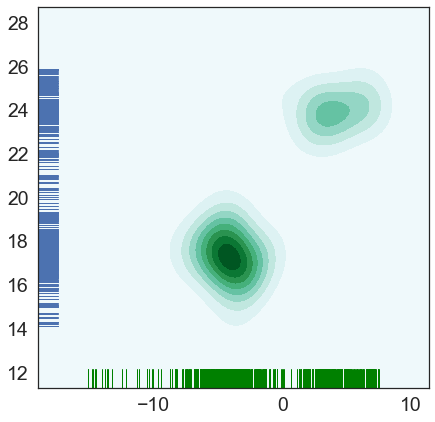

In [39]:
f, ax = plt.subplots(figsize=(7, 7))

sns.kdeplot(df_temp_jan.resample("H")["outdoor"].mean().dropna().values,
            df_temp_jan.resample("H")["indoor"].mean().dropna().values, shade=True);
sns.rugplot(df_temp_jan.resample("H")["outdoor"].mean().dropna().values, color="g", ax=ax)
sns.rugplot(df_temp_jan.resample("H")["indoor"].mean().dropna().values, vertical=True, ax=ax);

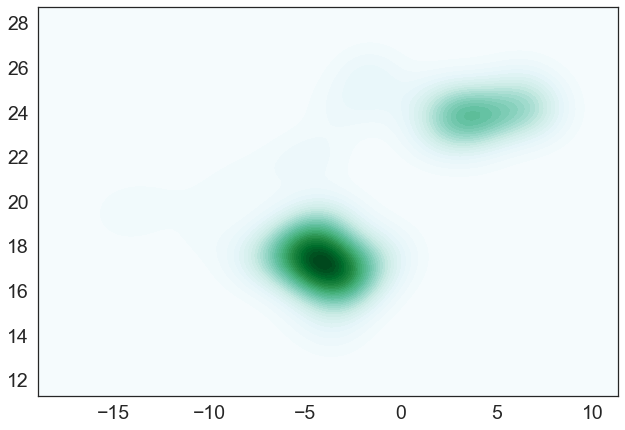

In [40]:
sns.kdeplot(df_temp_jan.resample("H")["outdoor"].mean().dropna().values,
            df_temp_jan.resample("H")["indoor"].mean().dropna().values, shade=True, n_levels=40);

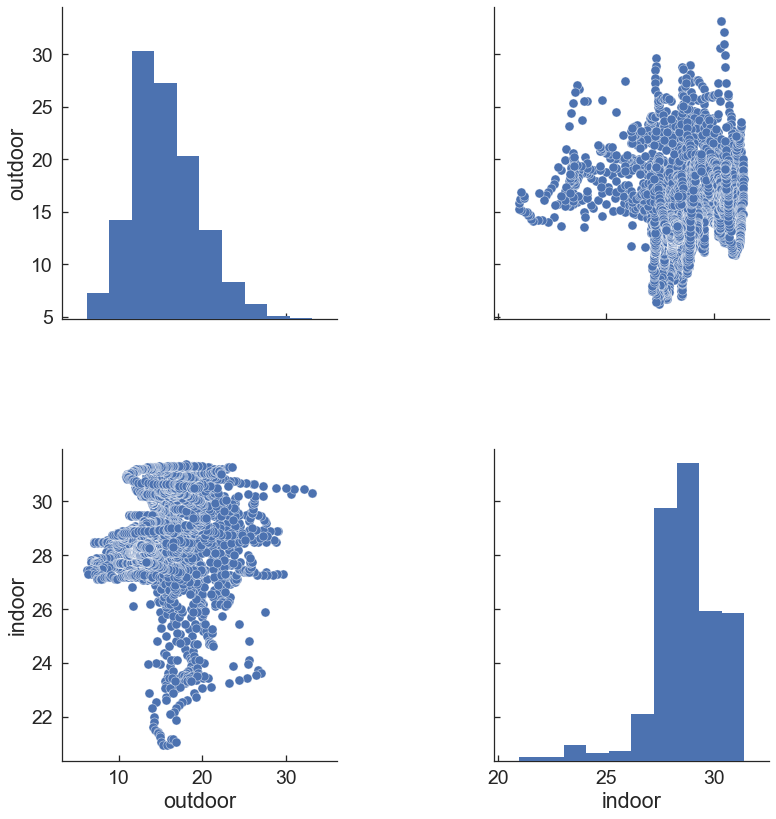

In [41]:
g=sns.pairplot(df_temp_jun.dropna())
g.fig.set_size_inches(15,15)

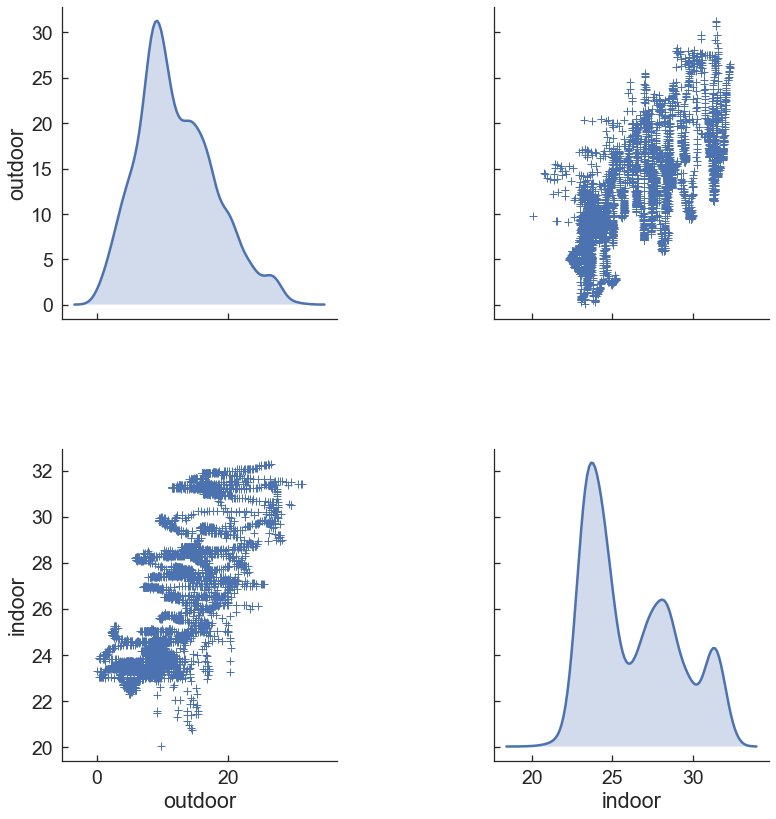

In [42]:
g = sns.pairplot(df_temp_may.dropna(), diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                  diag_kws=dict(shade=True))
g.fig.set_size_inches(15,15)

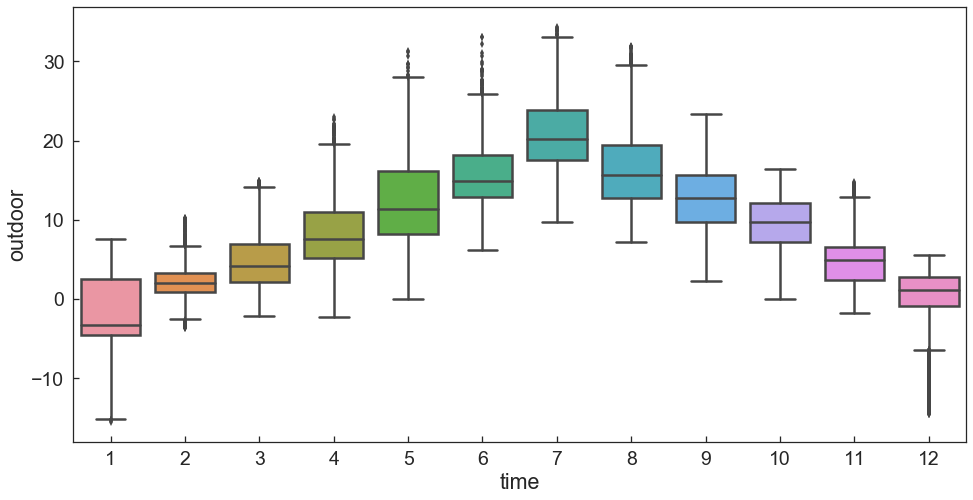

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.boxplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor);

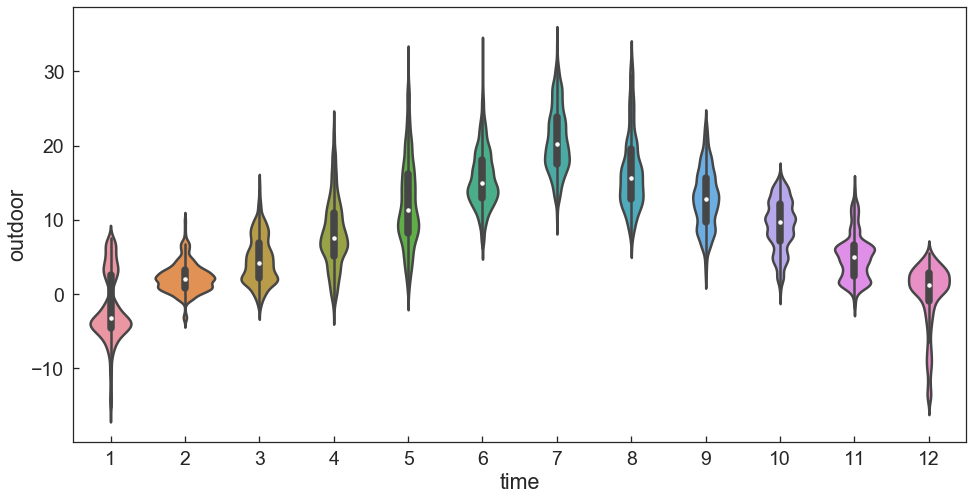

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor);

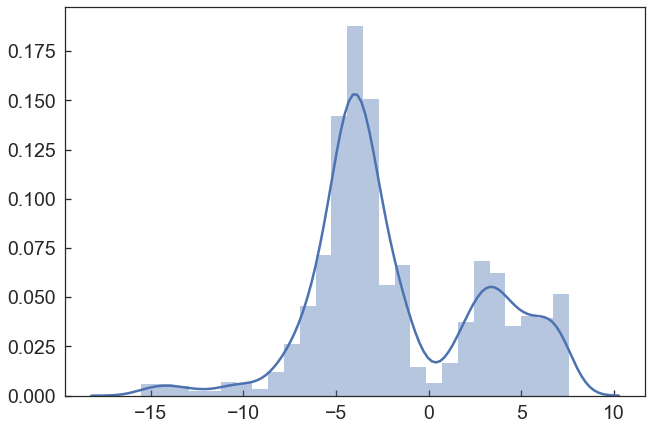

In [45]:
sns.distplot(df_temp_jan["outdoor"].dropna().values)


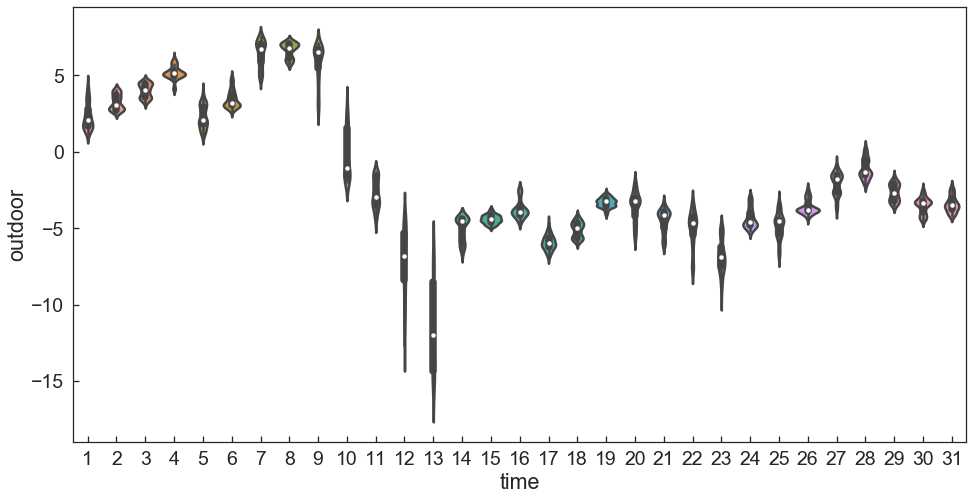

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.violinplot(x=df_temp_jan.dropna().index.day, y=df_temp_jan.dropna().outdoor);

In [47]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
df_temp["day"] = df_temp.index.day

In [48]:
df_temp.head()

,outdoor,indoor,month,hour,day
time,,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0,1
2014-01-01 00:10:00+01:00,4.25,22.00,1,0,1
2014-01-01 00:20:00+01:00,4.19,22.00,1,0,1
2014-01-01 00:30:00+01:00,4.06,22.00,1,0,1
2014-01-01 00:40:00+01:00,4.06,22.00,1,0,1


In [49]:
df_temp.tail()

,outdoor,indoor,month,hour,day
time,,,,,
2014-12-30 23:10:00+01:00,1.56,11.75,12,23,30
2014-12-30 23:20:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:30:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:40:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:50:00+01:00,1.75,11.81,12,23,30


### Pivot Tables 

A table that summarizes another table.

In [50]:
df_temp.tail()

,outdoor,indoor,month,hour,day
time,,,,,
2014-12-30 23:10:00+01:00,1.56,11.75,12,23,30
2014-12-30 23:20:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:30:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:40:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:50:00+01:00,1.75,11.81,12,23,30


In [51]:
# Create a new table where the month is the row index, 
#  the columns are defined by the hour of the day,
#  and the values are given by the mean of the values within that hour-month category
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [52]:
type(table)

pandas.core.frame.DataFrame

In [53]:
table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


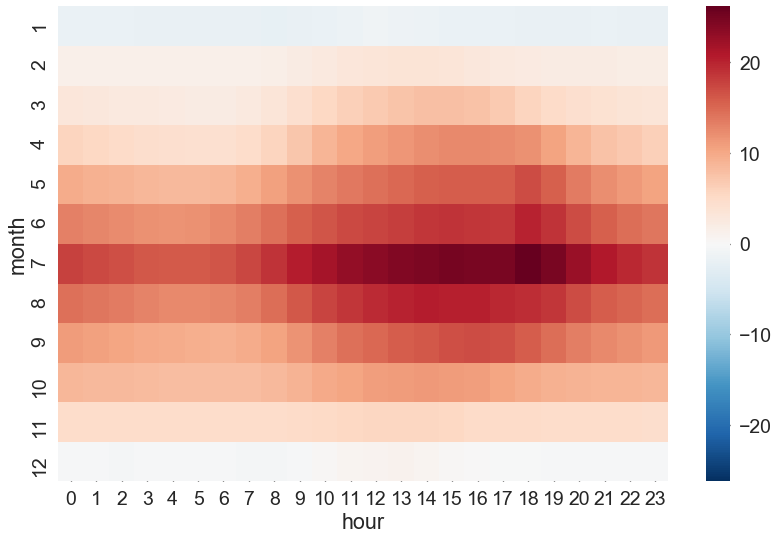

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(table, ax=ax);
fig.tight_layout()